In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from straklip import config, input_tables
from datetime import datetime
from dataframe import DataFrame
from utils_plot import plot_cmd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
pipe_cfg='/Users/gstrampelli/PycharmProjects/Giovanni/src/straklip/straklip/tests/pipeline_logs/NGC1976/pipe.yaml'
data_cfg='/Users/gstrampelli/PycharmProjects/Giovanni/src/straklip/straklip/tests/pipeline_logs/NGC1976/data.yaml'

pipe_cfg = config.configure_pipeline(pipe_cfg,pipe_cfg=pipe_cfg,data_cfg=data_cfg,dt_string=dt_string)
data_cfg = config.configure_data(data_cfg,pipe_cfg)
dataset = input_tables.Tables(data_cfg, pipe_cfg)

In [3]:
DF = DataFrame(path2out=dataset.pipe_cfg.paths['out'])
DF.load_dataframe()

[0.00111165 0.00087416 0.00184614 0.00122717 0.00168201 0.00077699] [0.00099108 0.00090746 0.00170041 0.00109595 0.00164137 0.00062343]
[0.00092559 0.00040509 0.00087883 0.00109276 0.00092854 0.00134619
 0.00136492 0.00095419 0.00056067 0.00102008 0.00420203 0.00109181
 0.00235451 0.002248   0.00192348 0.00094689 0.00062043 0.00109757
 0.00160067 0.00207494 0.00370371 0.00119245 0.00118188 0.00115156
 0.00092465 0.00132788 0.00048669 0.00130001 0.00316017 0.00116085
 0.0010189  0.00105729 0.00127721 0.00087406 0.00126749 0.00116313
 0.00077355 0.00056971 0.00038507 0.000621   0.00090725 0.0012145
 0.00110374] [0.00071003 0.00042604 0.00090446 0.00096057 0.00108729 0.00150141
 0.00153071 0.00087778 0.00059182 0.00078236 0.00404658 0.00122658
 0.00244609 0.00314833 0.00201191 0.00107727 0.0006052  0.00106233
 0.00190853 0.00170753 0.00309294 0.00102505 0.00106739 0.00112456
 0.00094241 0.00143702 0.00047774 0.00109882 0.00462337 0.00082275
 0.00076241 0.00125511 0.00108346 0.00069927 0.0

/Users/gstrampelli/PycharmProjects/Giovanni/src/straklip/straklip/utils/utils_plot.py:1045: RuntimeWarning: All-NaN slice encountered
  ax.errorbar(ex, mag_bins[elno], yerr=yerr, xerr=xerr,ecolor='k')


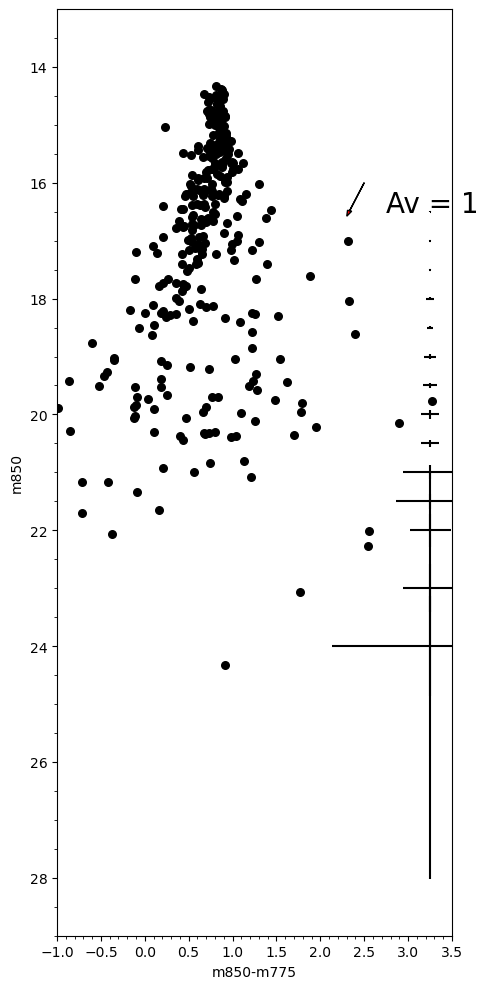

In [10]:
dist=DF.dist
edist=5
DM=5*np.log10(dist/10)
ID_list=DF.avg_targets_df.loc[DF.avg_targets_df.type!=0].avg_ids.unique()
selected_filter_label_list=DF.filters
lw=1.5
s=2
sl=20
cmap='winter'
colorbar=False
cbar_label='SN on distance'

A1,A2 = [DF.Av[i] for i in selected_filter_label_list]
filter1,filter2=selected_filter_label_list
color_list=[]

iso_mass_list=np.arange(0.001,2,0.01)
iso_age_list=[0.01,1,100]
iso_logSPacc_list=[-5]

fig,ax=plt.subplots(1,1,figsize=(5,10))
plot_cmd(fig,ax,DF.avg_targets_df,filter1,filter1,filter2,np.arange(14.,25.5,0.5),A1,A1-A2,16,2.5,3.25,DM,1,[-1.,3.5],[29,13],ID_label='avg_ids',ID_list=ID_list,s=s,cmap=cmap,label='',cm=0.,cM=3.5)
ax.minorticks_on()
ax.tick_params(which="both", bottom=True,left=True)

plt.tight_layout()
plt.show()
